In [235]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')

In [236]:
data_file = './/Amazon_Unlocked_Mobile.csv'
n = 413000  
s = 20000 
skip = sorted(random.sample(range(1,n),n-s))


df = pd.read_csv( data_file, delimiter = ",", skiprows = skip)

In [237]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I brought this phone as a replacement for my d...,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,Just... not good. The phone has great screen r...,0.0
4,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,We just received the phone a few days ago. Put...,3.0
...,...,...,...,...,...,...
20835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
20836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
20837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
20838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [238]:
df.isnull().sum()

Product Name       0
Brand Name      3132
Price            288
Rating             0
Reviews            2
Review Votes     583
dtype: int64

In [239]:
df['Reviews']

0        nice phone, nice up grade from my pantach revu...
1        It works good but it goes slow sometimes but i...
2        I brought this phone as a replacement for my d...
3        Just... not good. The phone has great screen r...
4        We just received the phone a few days ago. Put...
                               ...                        
20835                       another great deal great price
20836                                                   Ok
20837          Passes every drop test onto porcelain tile!
20838    I returned it because it did not meet my needs...
20839    Only downside is that apparently Verizon no lo...
Name: Reviews, Length: 20840, dtype: object

In [240]:
df = df.dropna(subset= ['Reviews'])

In [241]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I brought this phone as a replacement for my d...,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,Just... not good. The phone has great screen r...,0.0
4,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,We just received the phone a few days ago. Put...,3.0
...,...,...,...,...,...,...
20835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
20836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
20837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
20838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


### Rating Mapping

In [242]:
Review_mapping =  {0: '0',1 : '0', 2 :'0',3 : '0', 4 : '1', 5 : '1'}
Review_mapping

{0: '0', 1: '0', 2: '0', 3: '0', 4: '1', 5: '1'}

In [243]:
Rating = lambda x: Review_mapping.get(x,x)
df['Rating']=df.Rating.map(Rating)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [244]:
df['Rating'].unique()

array(['1', '0'], dtype=object)

In [245]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,"nice phone, nice up grade from my pantach revu...",0.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,It works good but it goes slow sometimes but i...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I brought this phone as a replacement for my d...,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,0,Just... not good. The phone has great screen r...,0.0
4,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,We just received the phone a few days ago. Put...,3.0
...,...,...,...,...,...,...
20835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,another great deal great price,0.0
20836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,0,Ok,0.0
20837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,Passes every drop test onto porcelain tile!,0.0
20838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,0,I returned it because it did not meet my needs...,0.0


### Text Analysis

In [246]:
df.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [247]:
a = df.iloc[:,3]
print(a)

0        1
1        1
2        1
3        0
4        1
        ..
20835    1
20836    0
20837    1
20838    0
20839    1
Name: Rating, Length: 20838, dtype: object


In [248]:
b = df.iloc[:,4]

In [249]:
doc = pd.concat([a,b], axis = 1)

In [250]:
train_docs, test_docs = train_test_split(doc, test_size = 0.3)

In [251]:
def review_to_wordlist(review, remove_stopwords = True):

    
    review_text = re.sub('[^a-zA-Z]'," ", review)
    #review_text에 영어만 넣기 
    
    words = review_text.lower().split()
    #소문자로 바꿔주고 그것들을 분리해준다 
    
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        words = [w for w in words if not w in stops]
        #stops에 영어의 불용어를 넣어줌 
        #words는 소문자로 변환되고 띄어져있는 것이며 
        #stops에 있는 불용어를 제외하고 넣어줌 
        
    b = []
    stemmer = english_stemmer
    for word in words:
        b.append(stemmer.stem(word))
        #words에 전처리된것들의 어간들만 추출 
        
    return(b)


In [252]:
clean_train_reviews = []
for review in train_docs['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test_docs['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

In [253]:
c = train_docs['Rating']
d = test_docs['Rating']

In [254]:
c.isnull().sum()

0

In [255]:
len(c)

14586

In [256]:
len(d)

6252

In [302]:
train_docs.isnull().sum()

Rating     0
Reviews    0
dtype: int64

In [303]:
test_docs.isnull().sum()

Rating     0
Reviews    0
dtype: int64

# ================ 5/1

### LSTM

In [324]:
max_words = 20000
max_len = 30
batch_size = 126 # 한번에 몇개씩 학습할지
EPOCHS = 20 # 1 epoch는 20000/126을 업데이트한다.

In [325]:
vectorizer = TfidfVectorizer( min_df=2, max_df=0.95, max_features = 1000, ngram_range = ( 1, 3 ),
                              sublinear_tf = True )

vectorizer = vectorizer.fit(clean_train_reviews)
train_features = vectorizer.transform(clean_train_reviews)

test_features = vectorizer.transform(clean_test_reviews)

In [321]:
train_features

<14586x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 214042 stored elements in Compressed Sparse Row format>

In [258]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [280]:
#참고 
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 가장 빈도가 높은 1,000개의 단어만 선택하도록 Tokenizer 객체를 만듭니다.
tokenizer = Tokenizer(num_words=1000)
# 단어 인덱스를 구축합니다.
a=tokenizer.fit_on_texts(samples)

# 문자열을 정수 인덱스의 리스트로 변환합니다.
#sequences = tokenizer.texts_to_sequences(samples)


In [307]:
len(X_train)

14586

In [328]:
X_train = train_features.toarray()
X_test = test_features.toarray()
#이거 중요 

In [329]:
y_train = train_docs['Rating']
y_test = test_docs['Rating']

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
#tf.data.Dataset.from_tensor_slices : 텐서플로우에서 사용하기 위해 데이터셋을 만듬 

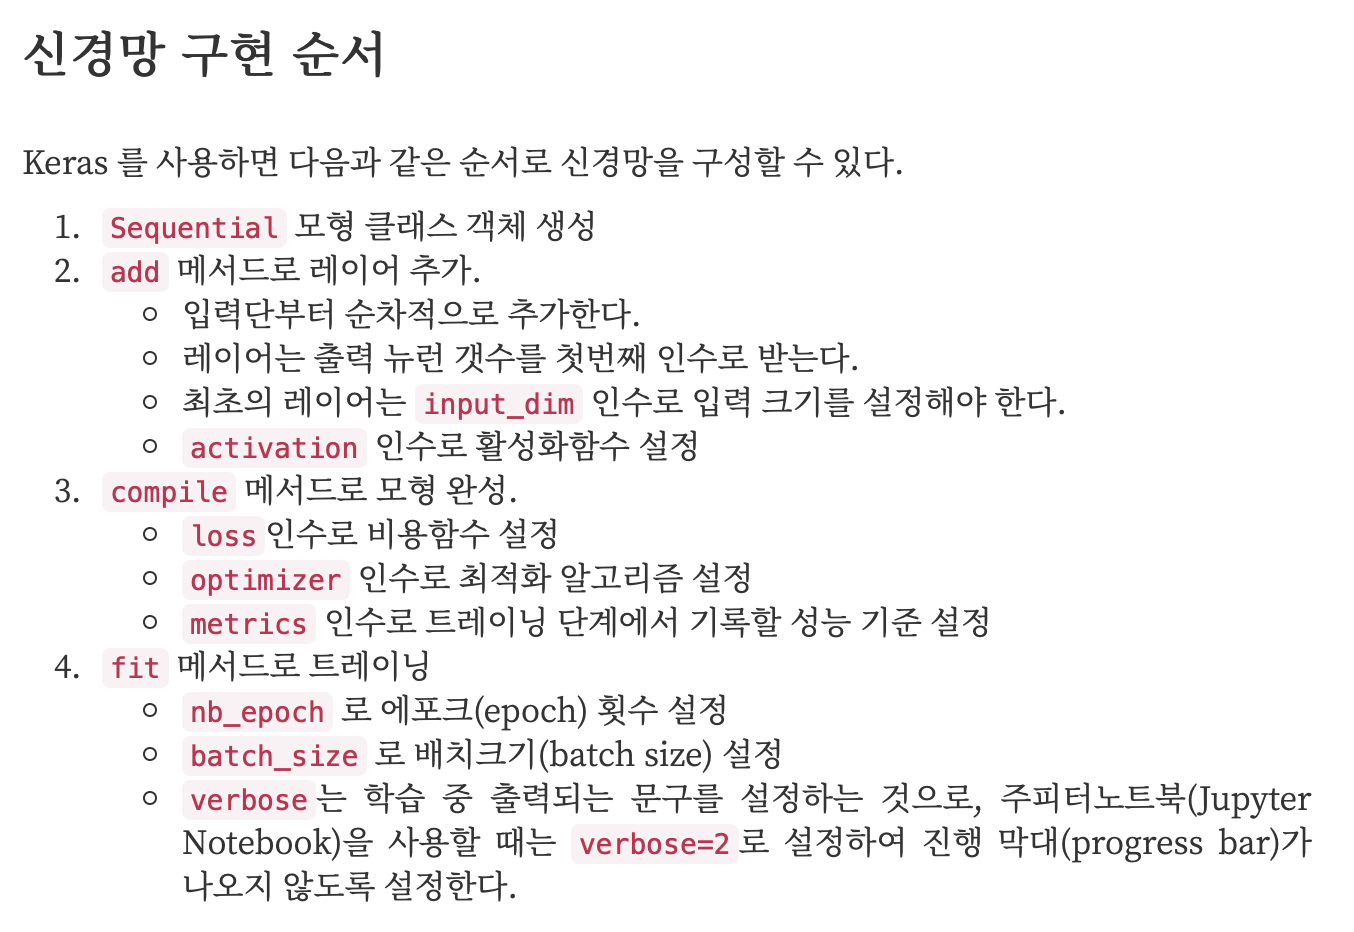

model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.3)) 
model.add(Dense(1, activation('softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=1,
          validation_data=(X_test, Y_test))
score, acc = model.evaluate(X_test, Y_test,
                            batch_size=batch_size)

In [310]:
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.3)) 
model.add(Dense(1, activation = 'softmax'))


In [311]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128,
               dropout = 0.5,))
model.add(Dense(1, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Emdedding : 단어를 밀집 벡터로 만드는 역할 
#희소벡터와 반대되는 개념이라고 생각, 모든 값들이 실수값을 가지는 벡터

In [312]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)

In [331]:
history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = EPOCHS, 
                    batch_size = batch_size, 
                    callbacks = [earlystopper] )
#학습을 해도 결과가 똑같아지는 문제가 발생 

Train on 14586 samples, validate on 6252 samples
Epoch 1/20
14586/14586 [==============================] - 340s 23ms/sample - loss: 4.9261 - acc: 0.6787 - val_loss: 4.7416 - val_acc: 0.6891
Epoch 2/20
14586/14586 [==============================] - 343s 24ms/sample - loss: 4.9261 - acc: 0.6787 - val_loss: 4.7416 - val_acc: 0.6891
Epoch 3/20
14586/14586 [==============================] - 346s 24ms/sample - loss: 4.9261 - acc: 0.6787 - val_loss: 4.7416 - val_acc: 0.6891
Epoch 4/20
14586/14586 [==============================] - 347s 24ms/sample - loss: 4.9261 - acc: 0.6787 - val_loss: 4.7416 - val_acc: 0.6891
Epoch 5/20
14586/14586 [==============================] - 349s 24ms/sample - loss: 4.9261 - acc: 0.6787 - val_loss: 4.7416 - val_acc: 0.6891
Epoch 6/20
14586/14586 [==============================] - 349s 24ms/sample - loss: 4.9261 - acc: 0.6787 - val_loss: 4.7416 - val_acc: 0.6891
Epoch 7/20
14586/14586 [==============================] - 350s 24ms/sample - loss: 4.9261 - acc: 0.6787 -

KeyboardInterrupt: 

In [115]:
score, acc =model.evaluate(X_test, y_test, batch_size = batch_size)

6251/6251 [==============================] - 22s 4ms/sample - loss: 0.6161 - acc: 0.6938


In [116]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.6161393342333171
Test Accuracy: 0.693809


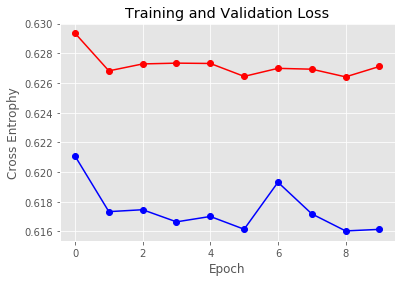

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

#overfitting이 되고 있다.